# <딥러닝 첫 번째 시간, 이미지 분류>

# 1. 모듈 임포트

In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
import os
os.getcwd()  # current working directory

'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망'

# 2. 데이터 불러오기(MNIST 중 0과 1만)

In [4]:
def load_data(end_idx):
    """
     This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)
    """
    X = np.load("./data/X.npy")
    y = np.load("./data/y.npy")
    X = X[0:end_idx]  # 0과 1의 데이터만 분류해보기
    y = y[0:end_idx]
    return X, y

X, y = load_data(1000)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [6]:
print('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

# 3. 데이터 이미지

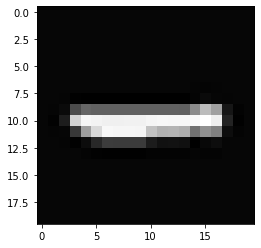

In [9]:
pixels = X[999].reshape((20, 20)).T
plt.imshow(pixels, cmap='gray')
plt.show()

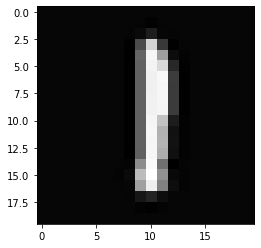

In [6]:
plt.imshow(X[999].reshape((20,20)).T, cmap='gray')

In [9]:
print ('y의 첫 번째 원소 : ', y[0,0])
print ('y의 마지막 원소 : ', y[-1,0])
print ('X의 shape은 : ' + str(X.shape))
print ('y의 shape은 : ' + str(y.shape))

y의 첫 번째 원소 :  0
y의 마지막 원소 :  1
X의 shape은 : (1000, 400)
y의 shape은 : (1000, 1)


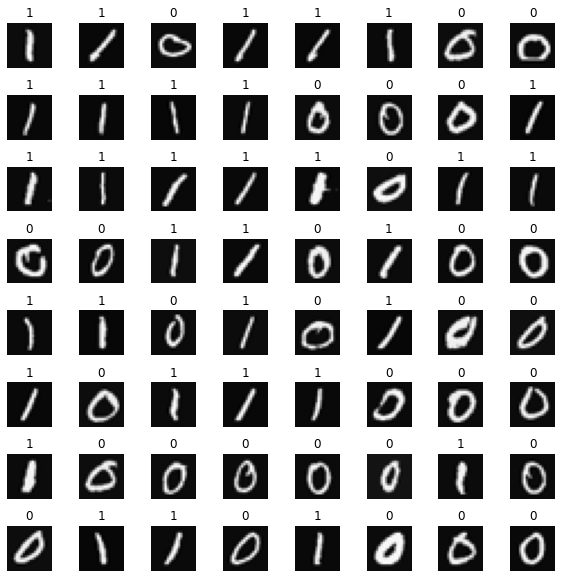

In [10]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # 랜덤 인덱스 생성
    random_index = np.random.randint(m)

    # 랜덤하게 한 행을 선택하고, 20x20으로 reshape
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # 이미지 출력
    ax.imshow(X_random_reshaped, cmap='gray')

    # 이미지 상단에 레이블 추가 및 축 비활성화
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# 4. 케라스로 예측모델 구축

## 4.1 모델 생성

In [10]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    # 인풋 사이즈 지정(픽셀 수)
        Dense(25, activation='sigmoid'),  # 25개 유닛(뉴런), 커널 초기화함수 디폴트는 글로럿(시그모이드의 경우)
        Dense(15, activation='sigmoid'),  # 15개 유닛
        Dense(1,  activation='sigmoid'),  # 1개 유닛(출력)
    ], name = "my_model"
)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


## 4.2 파라미터 갯수

In [11]:
L1_num_params = 400 * 25 + 25  # 가중치 W1 파라미터 + 편향 b1 파라미터
L2_num_params = 25 * 15 + 15   # W2 파라미터  + b2 파라미터
L3_num_params = 15 * 1 + 1     # W3 파라미터  + b3 파라미터
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


## 4.3 초기화된 가중치

In [12]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [13]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.19288492],
       [ 0.5722324 ],
       [ 0.2077452 ],
       [ 0.42918414],
       [ 0.19124037],
       [-0.44742405],
       [ 0.33564413],
       [ 0.5535173 ],
       [ 0.09066468],
       [-0.01024389],
       [ 0.15878451],
       [ 0.00250876],
       [ 0.5251797 ],
       [ 0.09586042],
       [-0.46533445]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


## 4.4 모델 컴파일 및 학습

In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20  # 20에포크만 실행
)

Epoch 1/20
32/32 [==============================] - 6s 3ms/step - loss: 0.8319
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6378
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5238
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.4157
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3255
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2597
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2134
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1800
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1547
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1349
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1191
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1061
Epoch 13/20
32/32 [==============================

## 4.5 학습결과 확인

In [15]:
prediction = model.predict(X[0].reshape(1,400))  # 0의 이미지
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # 1의 이미지
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 250ms/step
 predicting a zero: [[0.06696872]]
1/1 [==============================] - 0s 36ms/step
 predicting a one:  [[0.97688645]]


## 4.6 임계값 지정(0.5)

In [17]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


# 5. 케라스 이진분류모델의 추론결과 시각화

1/1 [==============================] - 0s 21ms/step


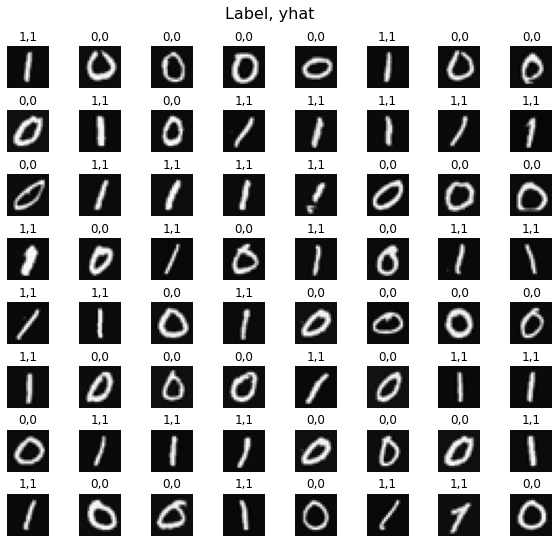

In [18]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])  # rect: 각각 좌, 하, 우, 상

for i,ax in enumerate(axes.flat):
    # m개의 랜덤인덱스 생성
    random_index = np.random.randint(m)

    # 랜덤인덱스 행의 모든 열 값을 가져다가 재배열
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # 이미지 출력
    ax.imshow(X_random_reshaped, cmap='gray')

    # 케라스모델 예측
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # 참값, 예측값 레이블 추가
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=16)
plt.show()

# 6. 넘파이로 직접 코딩해본다면?

## 6.1 밀집층(dense layer) 모사

In [19]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return a_out

## 6.2 활성화함수 sigmoid

In [20]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

## 6.3 간단한 계산결과(참고)

In [21]:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(x_tst)
print(W_tst)
print(b_tst)
print(A_tst)

[0.1 0.2]
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
[0.1 0.2 0.3]
[0.54735762 0.57932425 0.61063923]


## 6.4 Sequential 클래스 모사

In [22]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

## 6.5 위에서 학습한 가중치 가져오기

In [23]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

## 6.6 모사한 넘파이 모델로 예측해보기

In [24]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
print("prediction = ", prediction)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
print("prediction = ", prediction)
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

prediction =  [0.0178234]
yhat =  0  label=  0
prediction =  [0.98854758]
yhat =  1  label=  1


1/1 [==============================] - 0s 17ms/step


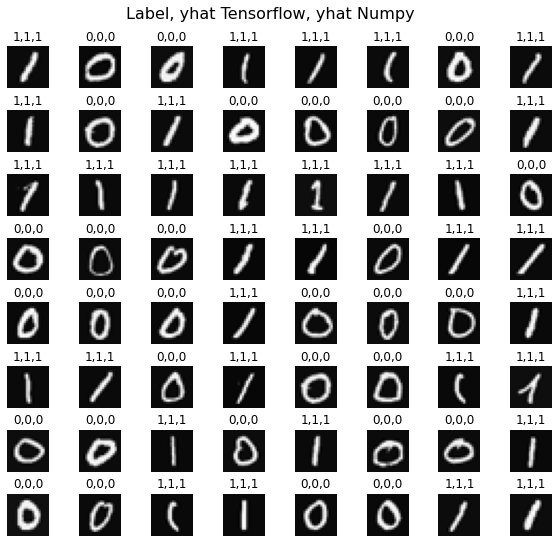

In [25]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])  # 각각 좌 하 우 상 순서

for i,ax in enumerate(axes.flat):
    # m개의 랜덤한 정수배열 생성
    random_index = np.random.randint(m)

    # 샘플 하나를 골라서 20x20 행렬로 만들기
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # 이미지 출력
    ax.imshow(X_random_reshaped, cmap='gray')

    # 넘파이모델 예측 실행 및 예측값 저장
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # 케라스모델 예측 실행 및 예측값 저장
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)

    # 이미지 상단에 두 개의 예측값 출력
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off()

fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

# 7. [응용] K-Food 이미지 분류 모델 구축

딥러닝 기술을 이용하여 강아지 종 분류, 꽃 종류 분류, 자동차 분류, 사물 구분 등 다양한 사례를 생각해 볼 수 있습니다. 코딩 유튜버 조코딩 님의 "동물상테스트" 한 번씩 다들 해 보지 않으셨나요?

여기서 분류해볼 음식 종류는 총 여섯 가지입니다.

1. 치킨
2. 김치
3. 돌솥밥
4. 삼겹살
5. 제육볶음
6. 된장찌개

kfood 폴더 내에 각각 30장의 이미지가 저장되어 있습니다.

![](https://i.ibb.co/sw5LTYZ/238.png)
치킨

![](https://i.ibb.co/Lkwrrsj/239.png)
돌솥밥

위 6개 카테고리의 이미지들을 통해 K-food 분류모델을 만들어보겠습니다.

# 7-1. 데이터셋 만들기

In [26]:
from sklearn.model_selection import train_test_split
from PIL import Image  # pillow
import os
import numpy as np

In [27]:
os.getcwd()

'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망'

In [28]:
os.chdir("./kfood")
os.getcwd()

'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood'

In [29]:
categories = ["Chicken", "Dolsotbab", "Kimchi", "Jeyugbokk-eum", "Samgyeobsal", "SoybeanPasteStew"]

In [30]:
image_width = image_height = 64

In [31]:
# 데이터를 담을 변수
X = []
y = []

In [32]:
for idx, category in enumerate(categories):
    image_dir = os.path.join(os.getcwd(), category)
    files = [os.path.join(image_dir, i) for i in os.listdir(image_dir)]
    print(files)
    for i, f in enumerate(files):
        with Image.open(f) as img:
            img = img.convert("RGB").resize((image_width, image_height))
            data = np.asarray(img)
            X.append(data)
            y.append(idx)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

['C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_01.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_02.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_03.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_04.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_05.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_06.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_07.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_08.jpg', 'C:\\Users\\smj02\\PycharmProjects\\KIRD_Lecture20220526\\10_딥러닝의기초#이진분류신경망\\kfood\\Chicken\\chicken_09.jpg', 'C:\\User

In [33]:
dataset = np.array((X_train, X_test, y_train, y_test), dtype=object)
np.save(os.path.join(os.getcwd(), "kfood.npy"), dataset)

# 7-2. K-food 분류모델 학습하기

In [34]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.utils import np_utils
import numpy as np

## 데이터 로딩 및 전처리

In [35]:
X_train, X_test, y_train, y_test = np.load("./kfood.npy", allow_pickle=True)
print("X_train[0][0][0] before : ", X_train[0][0][0])
X_train = X_train.astype(float) / 255
print("X_train[0][0][0] after : ", X_train[0][0][0])
X_test = X_test.astype(float) / 255
print("y_train[0] before : ", y_train[0])
y_train = np_utils.to_categorical(y_train, len(categories))
print("y_train[0] after : ", y_train[0])
y_test = np_utils.to_categorical(y_test, len(categories))

X_train[0][0][0] before :  [255 255 255]
X_train[0][0][0] after :  [1. 1. 1.]
y_train[0] before :  0
y_train[0] after :  [1. 0. 0. 0. 0. 0.]


## 모델 구성

In [36]:
model = Sequential()
model.add(Convolution2D(filters=64, kernel_size=1, strides=1, padding="same",
                        input_shape=(64, 64, 3), kernel_initializer="he_normal", kernel_regularizer=l2(l=0.01)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(1/4))
model.add(Convolution2D(64, 1, 1, "same", input_shape=(64, 64, 3), kernel_initializer="he_normal",
                        kernel_regularizer=l2(l=0.01)))
model.add(Activation("relu"))
model.add(Convolution2D(64, 1, 1, "same", input_shape=(64, 64, 3), kernel_initializer="he_normal",
                        kernel_regularizer=l2(l=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(1/4))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(1/2))
model.add(Dense(len(categories)))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])


## 모델 학습

In [37]:
model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 65ms/step - loss: 24.2256 - accuracy: 0.1630
Epoch 2/100
9/9 [==============================] - 1s 80ms/step - loss: 10.5676 - accuracy: 0.2444
Epoch 3/100
9/9 [==============================] - 1s 82ms/step - loss: 6.0779 - accuracy: 0.3704
Epoch 4/100
9/9 [==============================] - 1s 80ms/step - loss: 5.2780 - accuracy: 0.3333
Epoch 5/100
9/9 [==============================] - 1s 80ms/step - loss: 4.9352 - accuracy: 0.3852
Epoch 6/100
9/9 [==============================] - 1s 76ms/step - loss: 4.6317 - accuracy: 0.5407
Epoch 7/100
9/9 [==============================] - 1s 75ms/step - loss: 4.2248 - accuracy: 0.6444
Epoch 8/100
9/9 [==============================] - 1s 74ms/step - loss: 4.2838 - accuracy: 0.6000
Epoch 9/100
9/9 [==============================] - 1s 75ms/step - loss: 4.0972 - accuracy: 0.5926
Epoch 10/100
9/9 [==============================] - 1s 73ms/step - loss: 3.9857 - accuracy: 0.7037
Epoch 11/100
9/9 

## 모델 평가하기

In [38]:
score_test = model.evaluate(X_test, y_test)
print("loss: ", score_test[0])
print("accuracy: ", score_test[1])

2/2 [==============================] - 0s 12ms/step - loss: 3.6006 - accuracy: 0.4889
loss:  3.600600242614746
accuracy:  0.4888888895511627


In [39]:
score_train = model.evaluate(X_train, y_train)
print("loss: ", score_train[0])
print("accuracy: ", score_train[1])

5/5 [==============================] - 0s 19ms/step - loss: 1.3211 - accuracy: 0.9630
loss:  1.3210595846176147
accuracy:  0.9629629850387573


In [40]:
# 정확도를 최소 50% 이상 끌어올리려면???? NGD!
# (1) 가장 먼저 모델이 언더피팅인지 오버피팅인지 구분
# (2) 언더피팅의 경우 먼저 모델의 복잡도를 올려볼 것(데이터 추가는 큰 향상을 보이지 않음)
# (3) 오버피팅의 경우 먼저 ①데이터셋 추가, ②규제 강화 또는 ③드롭아웃 등의 방법을 사용해볼 것

model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=3, strides=3, padding="same",
                        input_shape=(64, 64, 3), kernel_initializer="he_normal", kernel_regularizer=l2(l=0.0001)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(1/4))
model.add(Convolution2D(64, 3, 3, "same", input_shape=(64, 64, 3), kernel_initializer="he_normal",
                        kernel_regularizer=l2(l=0.0001)))
model.add(Activation("relu"))
model.add(Convolution2D(64, 3, 3, "same", input_shape=(64, 64, 3), kernel_initializer="he_normal",
                        kernel_regularizer=l2(l=0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(1/4))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(1/2))
model.add(Dense(len(categories)))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=16, epochs=100)

score_test = model.evaluate(X_test, y_test)
print("loss: ", score_test[0])
print("accuracy: ", score_test[1])

Epoch 1/100
9/9 [==============================] - 1s 7ms/step - loss: 1.9945 - accuracy: 0.1481
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.9110 - accuracy: 0.1778
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 1.8449 - accuracy: 0.2000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1.8097 - accuracy: 0.2000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1.7615 - accuracy: 0.3037
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 1.7675 - accuracy: 0.2963
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 1.7359 - accuracy: 0.2963
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 1.7231 - accuracy: 0.2593
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 1.6454 - accuracy: 0.4148
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 1.5480 - accuracy: 0.3630
Epoch 11/100
9/9 [===========

## 모델 저장

In [41]:
model.save("./kfood_model.h5")

# 만들어진 모델을 활용한 음식 분류기

In [60]:
from keras.models import load_model
from glob import glob

model = load_model("./kfood_model.h5")
# test_image = ["./Chicken/chicken_01.jpg", "./Chicken/chicken_02.jpg",
#               "./Kimchi/kimchi15.jpg", "./Kimchi/kimchi07.jpg",
#               "./Samgyeobsal/Samgyeobsal04.jpg"]

test_image = glob(os.path.join(os.getcwd(), "Testdata", "*.jpg"))

X = []
files = []
for file in test_image:
    img = Image.open(file)
    img = img.convert("RGB").resize((64, 64))
    input_data = np.asarray(img).astype("float") / 255
    X.append(input_data)
    files.append(file)

X = np.array(X)

predict_result = model.predict(X)

right_count = 0
wrong_count = 0

for i, p in enumerate(predict_result):
    y = p.argmax()
    print("입력 : ", files[i].split("\\")[-1])
    print("예측 : ", f"[{y}]", categories[y], f"{p[y]*100:.2f}%")

    if categories[y][:3] == files[i].split("\\")[-1][:3]:
        print("[맞음]")
        right_count += 1
    else:
        print("[틀림]")
        wrong_count += 1
    print("\n")

2/2 [==============================] - 0s 5ms/step
입력 :  chicken_11.jpg
예측 :  [0] Chicken 99.97%
[틀림]


입력 :  chicken_12.jpg
예측 :  [0] Chicken 100.00%
[틀림]


입력 :  chicken_13.jpg
예측 :  [0] Chicken 99.98%
[틀림]


입력 :  chicken_14.jpg
예측 :  [0] Chicken 100.00%
[틀림]


입력 :  chicken_15.jpg
예측 :  [0] Chicken 99.92%
[틀림]


입력 :  chicken_16.jpg
예측 :  [0] Chicken 99.86%
[틀림]


입력 :  chicken_17.jpg
예측 :  [0] Chicken 100.00%
[틀림]


입력 :  chicken_18.jpg
예측 :  [0] Chicken 100.00%
[틀림]


입력 :  chicken_19.jpg
예측 :  [0] Chicken 100.00%
[틀림]


입력 :  chicken_20.jpg
예측 :  [0] Chicken 99.99%
[틀림]


입력 :  Dolsotbab_11.jpg
예측 :  [1] Dolsotbab 100.00%
[맞음]


입력 :  Dolsotbab_12.jpg
예측 :  [1] Dolsotbab 99.99%
[맞음]


입력 :  Dolsotbab_13.jpg
예측 :  [5] SoybeanPasteStew 88.07%
[틀림]


입력 :  Dolsotbab_14.jpg
예측 :  [1] Dolsotbab 99.99%
[맞음]


입력 :  Dolsotbab_15.jpg
예측 :  [1] Dolsotbab 100.00%
[맞음]


입력 :  Dolsotbab_16.jpg
예측 :  [1] Dolsotbab 100.00%
[맞음]


입력 :  Dolsotbab_17.jpg
예측 :  [1] Dolsotbab 100.00%
[맞음]


입력 :

In [62]:
print(f"정확도 : {right_count / (right_count + wrong_count) * 100:.2f} %")

정확도 : 56.67 %


# 참고할 만한 영상들

## 얀르쿤 2020년 딥러닝 강의
https://www.youtube.com/watch?v=0bMe_vCZo30&list=PL80I41oVxglKcAHllsU0txr3OuTTaWX2v

## 컨볼루션 신경망의 학습원리
https://youtu.be/FmpDIaiMIeA